## **Assignment 1 - Intensity Transformation And Neighborhood Fitering** ##

**NAS THEJANA**  
**D/ENG/22/0059/EE**

Github link :  
https://github.com/thej20d/VS-NEW.git

<p style="page-break-after:always;"></p>

**Question 1**

221
0
35
256


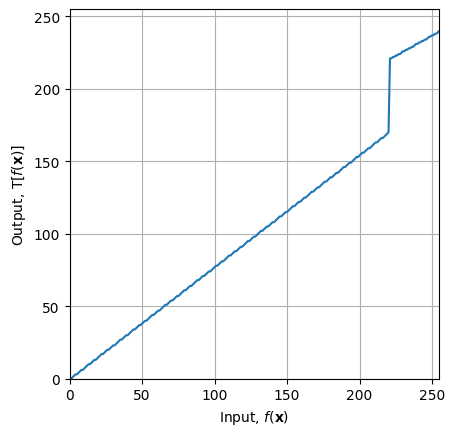

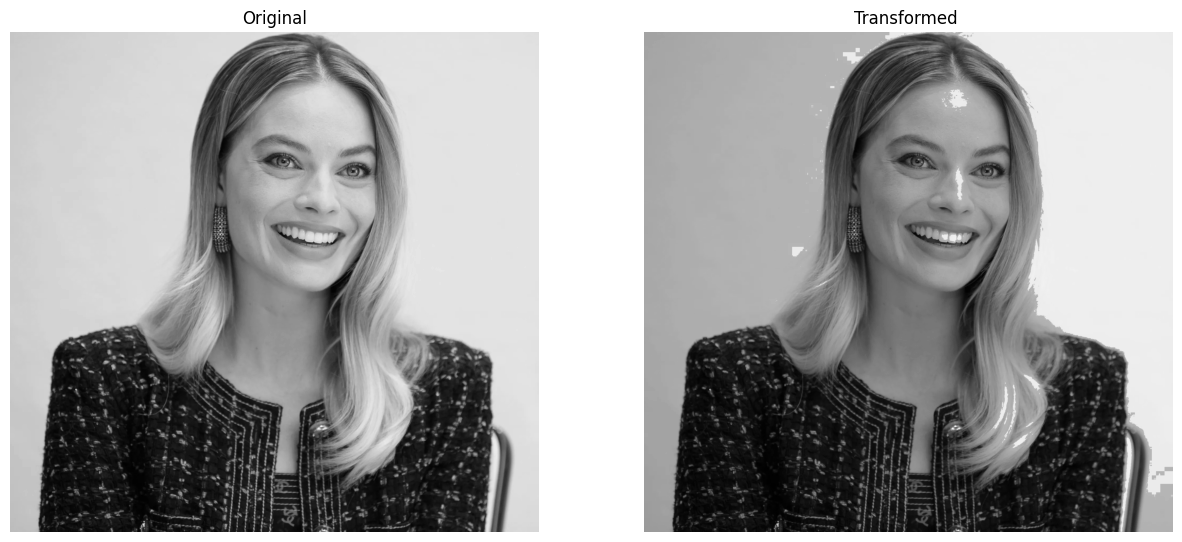

In [2]:

%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#not changed
im = cv.imread('margot_golden_gray.jpg', cv.IMREAD_GRAYSCALE)
assert im is not None
c= np.array([(220,170),(220,220)])

t1 = np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
print(len(t2))  
t3 = np.linspace(c[1,1]+1,240,255-c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1,t2),axis=0).astype('uint8')
transform = np.concatenate((transform,t3),axis=0).astype('uint8')
print(len(transform))

fig,ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel(r'Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
ax.grid()
plt.show()

Image_transform = cv.LUT(im, transform)

fig, ax = plt.subplots(1,2, figsize=(15,15))
ax[0].imshow(im, cmap="gray")
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(Image_transform, cmap="gray")
ax[1].set_title("Transformed ")
ax[1].axis("off")
plt.show()

**Question 2**

value of $\gamma$ = 0.7

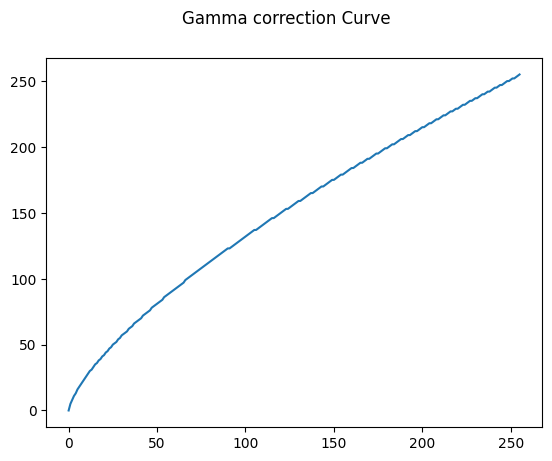

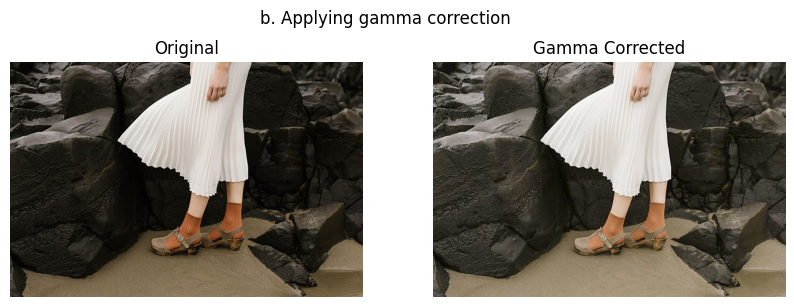

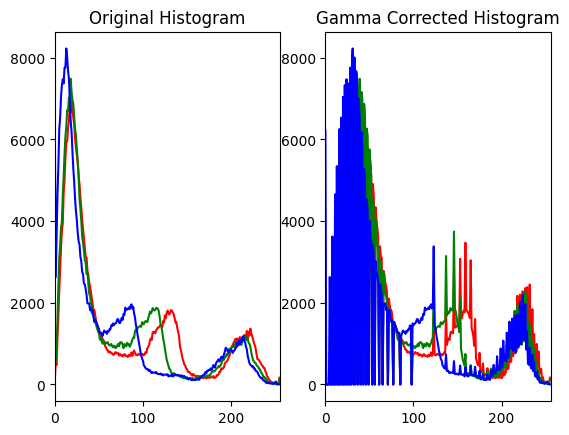

In [6]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img= cv.imread ('q2.jpg', cv.IMREAD_COLOR)
assert img is not None
imgc = cv.cvtColor(img, cv.COLOR_BGR2RGB)
color = ('r','g','b')
gamma = 0.7
t = np.array([(i/255.)**gamma*255 for i in range (256)], np.uint8)
g = t[imgc]
plt.suptitle("Gamma correction Curve")
plt.plot(t)
plt.show()


fig, ax = plt.subplots(1,2, figsize=(10,3.5))
fig.suptitle("b. Applying gamma correction")
ax[0].imshow(imgc)
ax[0].set_title("Original")
ax[0].axis("off")
ax[1].imshow(g)
ax[1].set_title("Gamma Corrected")
ax[1].axis("off")
plt.show()

for i , c in enumerate(color):
    plt.subplot(1,2,1)
    plt.title('Original Histogram')
    hist = cv.calcHist([imgc], [i], None, [256], [0,256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

    plt.subplot(1,2,2)
    plt.title('Gamma Corrected Histogram')
    hist_g = cv.calcHist([g], [i], None, [256], [0,256])
    plt.plot(hist_g, color = c)
    plt.xlim([0,256])

plt.show()



**Question 3**



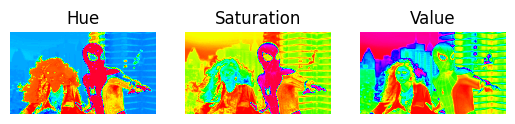

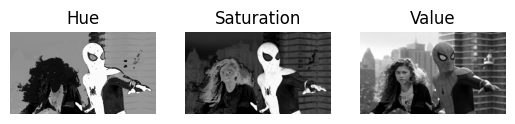

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('spider.png', cv.IMREAD_COLOR)
imgc = cv.cvtColor(img, cv.COLOR_BGR2RGB)
imgh = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h_img, s_img , v_img = cv.split(imgh)

fig, ax= plt.subplots(1,3)
ax[0].imshow(h_img, cmap='hsv')
ax[0].set_title('Hue')
ax[0].axis('off')
ax[1].imshow(s_img, cmap='hsv')
ax[1].set_title('Saturation')
ax[1].axis('off')
ax[2].imshow(v_img, cmap='hsv')
ax[2].set_title('Value')
ax[2].axis('off')
plt.show()

fig, ax= plt.subplots(1,3)
ax[0].imshow(h_img, cmap='gray')
ax[0].set_title('Hue')
ax[0].axis('off')
ax[1].imshow(s_img, cmap='gray')
ax[1].set_title('Saturation')
ax[1].axis('off')
ax[2].imshow(v_img, cmap='gray')
ax[2].set_title('Value')
ax[2].axis('off')
plt.show()



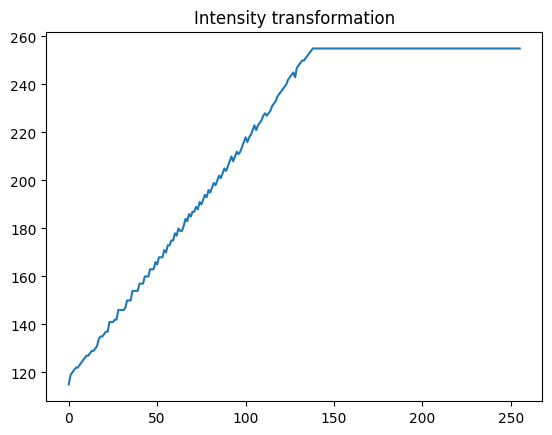

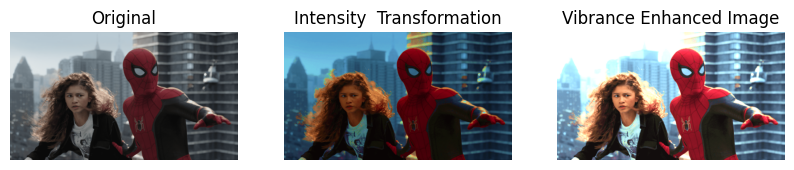

In [13]:
x= np.arange(0, 256).astype('uint8')
a = .9
sigma = 70
Y = np.minimum(((x)+(a*(np.exp(-(x-128)**2/(2*sigma**2))))*128), 255).astype('uint8')
image_transform = cv.LUT(s_img, Y)
plt.title('Intensity transformation')
plt.plot(Y)
plt.show()

newHSV = cv.merge([h_img,image_transform,v_img])
result =  cv.cvtColor(newHSV,  cv.COLOR_HSV2BGR)
newHSV1 = cv.cvtColor(result, cv.COLOR_BGR2RGB)
added_img = cv.add(newHSV1, imgc)


fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(imgc)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(newHSV1)
ax[1].set_title('Intensity  Transformation')
ax[1].axis('off')
ax[2].imshow(added_img)
ax[2].set_title('Vibrance Enhanced Image')
ax[2].axis('off')
plt.show()

**Question 4**

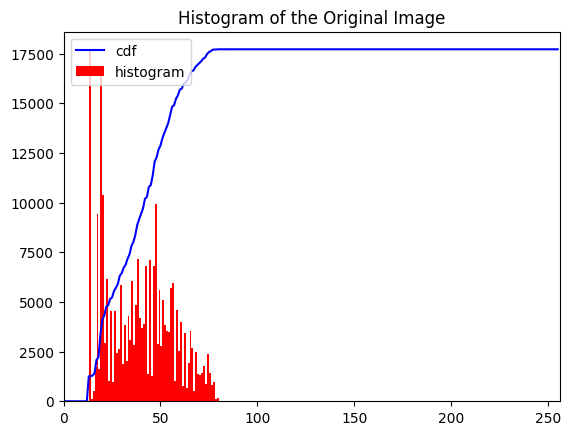

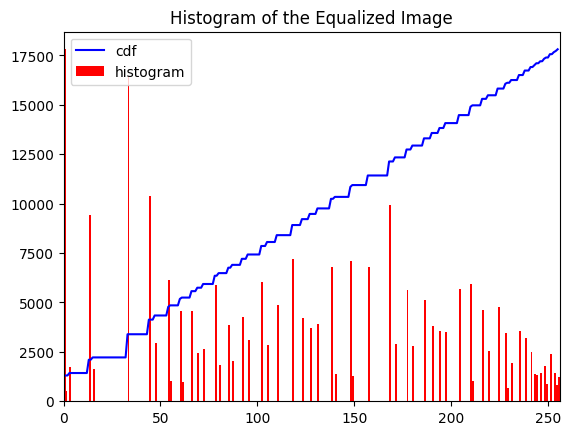

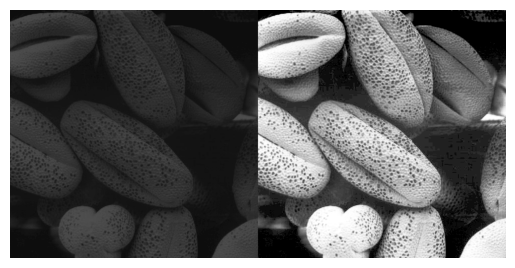

In [1]:
from typing import ChainMap
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt    
img = cv.imread('shells.tif',cv.IMREAD_GRAYSCALE)


hist,bins = np.histogram(img.ravel(),256,(0,256))
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.ravel(),256,(0,256), color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Original Image')
plt.show()

equ = cv.equalizeHist(img)

hist,bins = np.histogram(equ.ravel(),256,(0,256))
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.ravel(),256,(0,256), color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title('Histogram of the Equalized Image')
plt.show()

res = np.hstack((img,equ)) #stacking images side-by-side
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.imshow(res, cmap='gray')


**Question 5**

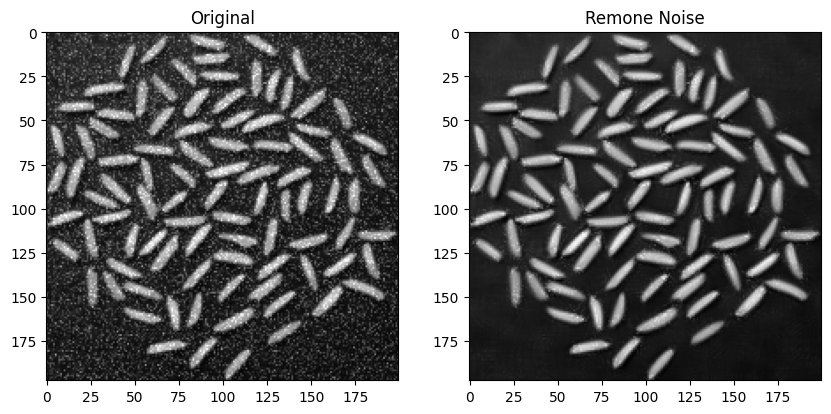

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('rice_gaussian_noise.png', cv.IMREAD_GRAYSCALE)  
denoised_im = cv.fastNlMeansDenoising(im, None, h = 28,searchWindowSize=10)

fig, ax= plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(denoised_im, cmap='gray')
ax[1].set_title('Remone Noise')
plt.show()


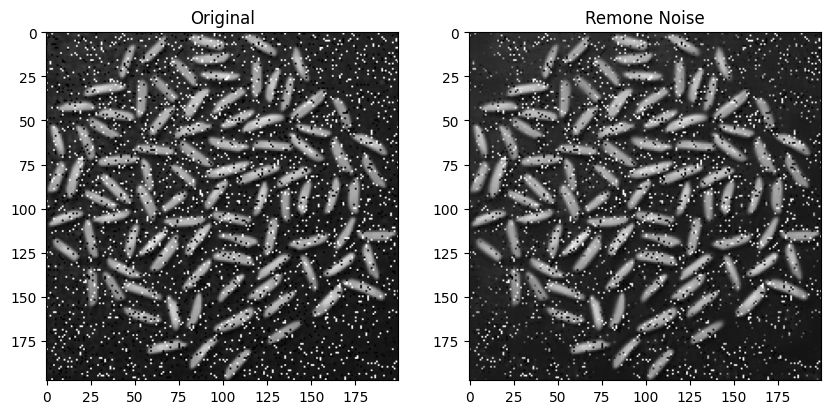

In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('rice_salt_pepper_noise.png', cv.IMREAD_GRAYSCALE)  
denoised_im1 = cv.fastNlMeansDenoising(im, None, h = 30,searchWindowSize=10)

fig, ax= plt.subplots(1,2, figsize=(10,20))
ax[0].imshow(im, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(denoised_im1, cmap='gray')
ax[1].set_title('Remone Noise')
plt.show()

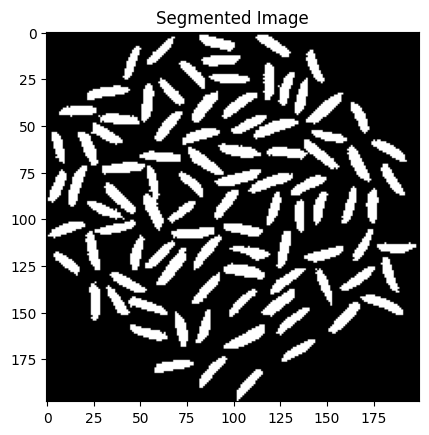

In [18]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
im = cv.imread('rice_gaussian_noise.png', cv.IMREAD_GRAYSCALE)

# Apply denoising
denoised_im = cv.fastNlMeansDenoising(im, None, h=28, searchWindowSize=10)

# Apply Otsu's thresholding
_, segmented_image = cv.threshold(denoised_im, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Display the segmented image
fig, ax = plt.subplots()
ax.imshow(segmented_image, cmap='gray')
ax.set_title('Segmented Image')
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

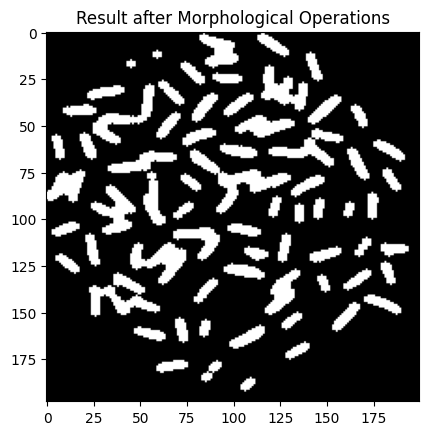

In [19]:
# Assuming the segmented_image from step (c) is used for morphological operations

# Define kernel for morphological operations
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5))

# Perform morphological closing to fill holes
closed_image = cv.morphologyEx(segmented_image, cv.MORPH_CLOSE, kernel)

# Perform morphological opening to remove small objects
opened_image = cv.morphologyEx(closed_image, cv.MORPH_OPEN, kernel)

# Display the result after morphological operations
fig, ax= plt.subplots()
ax.imshow(opened_image, cmap='gray')
ax.set_title('Result after Morphological Operations')
plt.show()
cv.waitKey(0)
cv.destroyAllWindows()

In [20]:
# Assuming the opened_image from step (d) is used for connected components

# Find connected components
num_labels, labels = cv.connectedComponents(opened_image)

# Subtract 1 to exclude the background label
num_rice_grains = num_labels - 1

print("Number of rice grains:", num_rice_grains)

Number of rice grains: 68


**Question 6**

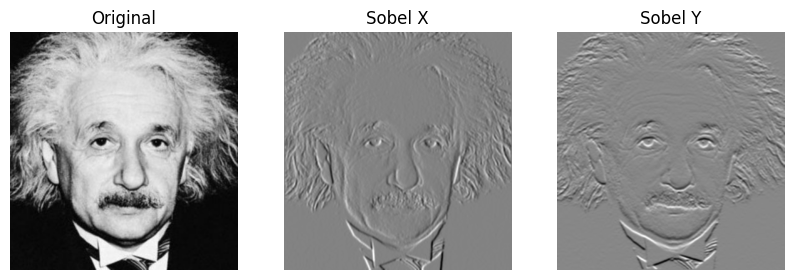

In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#image read
img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

#apply sobel filter using filter2D
sobel_x = cv.Sobel(img, cv.CV_64F, 1, 0, ksize=5)
sobel_y = cv.Sobel(img, cv.CV_64F, 0, 1, ksize=5)


#plot the images
fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(sobel_x, cmap='gray')
ax[1].set_title('Sobel X')
ax[1].axis('off')
ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title('Sobel Y')
ax[2].axis('off')
plt.show()


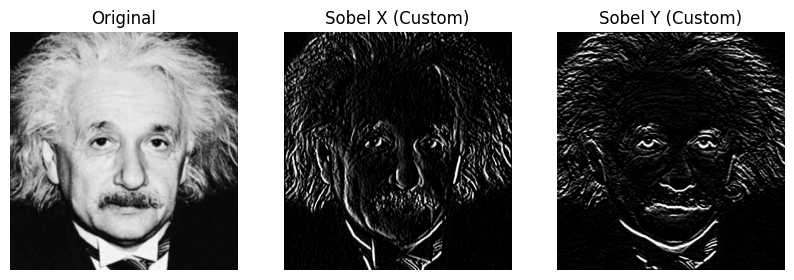

In [23]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#image read
img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

#define sobel kernels
sobel_kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

#convol the image with the sobel kernels
sobel_x = cv.filter2D(img, -1, sobel_kernel_x)
sobel_y = cv.filter2D(img, -1, sobel_kernel_y)

#Display the images
fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(sobel_x, cmap='gray')
ax[1].set_title('Sobel X (Custom)')
ax[1].axis('off')
ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title('Sobel Y (Custom)')
ax[2].axis('off')
plt.show()

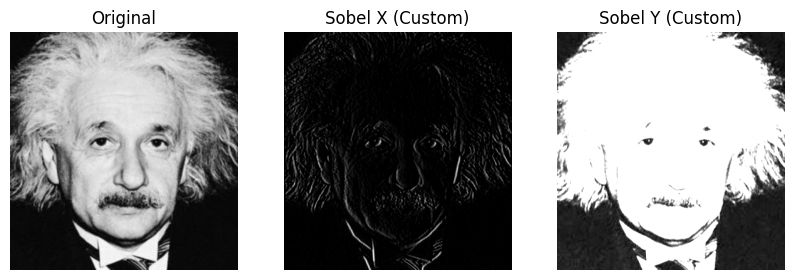

In [24]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#image read
img = cv.imread('einstein.png', cv.IMREAD_GRAYSCALE)

#define sobel kernels
sobel_kernel_x = np.array([[-1, 0, 1]])
sobel_kernel_y = np.array([[1], [2], [1]])

#convol the image with the sobel kernels
sobel_x = cv.filter2D(img, -1, sobel_kernel_x)
sobel_y = cv.filter2D(img, -1, sobel_kernel_y)

#Display the images
fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(img, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(sobel_x, cmap='gray')
ax[1].set_title('Sobel X (Custom)')
ax[1].axis('off')
ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title('Sobel Y (Custom)')
ax[2].axis('off')
plt.show()


**Question 7**

**Question 8**

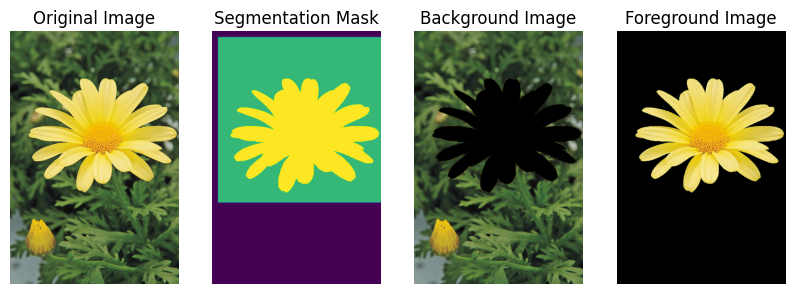

In [26]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('daisy.jpg')

# Creating a mask with same dimensions as image, and setting everything to background
mask = np.zeros(img.shape[:2], np.uint8)
background = np.zeros((1,65), np.float64)
# Defining the rectangle enclosing the flower
rect = (20, 20, 550, 550)
# Runing the grabCut algorithm
cv.grabCut(img, mask, rect, background, None, 5, cv.GC_INIT_WITH_RECT)
# Creating a new mask with the foreground pixels set to 1, and the background pixels set to 0
new_mask = np.where((mask == cv.GC_FGD) | (mask == cv.GC_PR_FGD), 1, 0).astype('uint8')
# Applying the mask to the original image to get the foreground and background images
foreground = cv.bitwise_and(img, img, mask=new_mask)
background = cv.bitwise_and(img, img, mask=1 - new_mask)

segmentation_mask = np.where(new_mask[:, :, np.newaxis] == 1, 255, 0).astype('uint8')

# Showing the final segmentation mask, foreground image, and background image
fig, ax = plt.subplots(1, 4, figsize=(10,10), sharey = True)

ax[0].imshow(img[:,:,::-1]),
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(mask)
ax[1].set_title('Segmentation Mask')
ax[1].axis('off')

ax[2].imshow(background[:,:,::-1]),
ax[2].set_title('Background Image')
ax[2].axis('off')

ax[3].imshow(foreground[:,:,::-1])
ax[3].set_title('Foreground Image')
ax[3].axis('off')

plt.show()

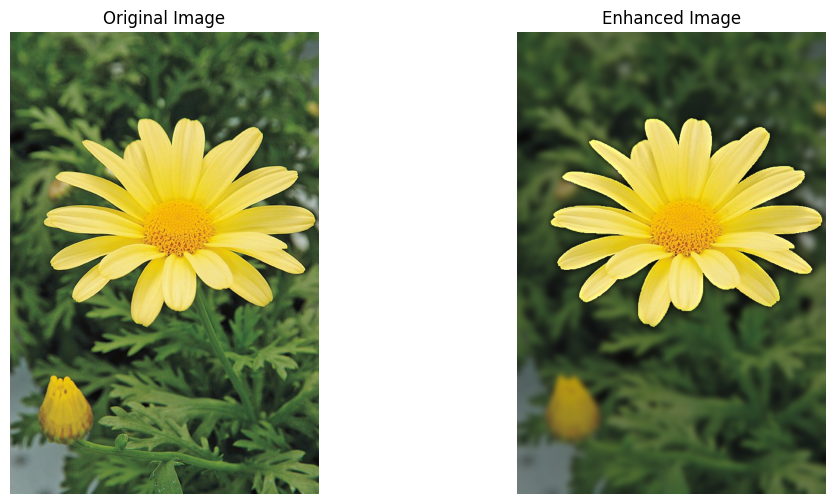

In [28]:
# Apply Gaussian blur to the background image
blurred_bg = cv.GaussianBlur(background, (31, 31), 0)
# Combining the foreground image and blurred background image
enhanced_img = cv.addWeighted(foreground, 1, blurred_bg, 0.8, 0)

# Displaying the original image and the enhanced image side by side
fig, ax = plt.subplots(1, 2, figsize=(12,6), sharey = True)

ax[0].imshow(img[:,:,::-1])
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(enhanced_img[:,:,::-1])
ax[1].set_title('Enhanced Image')
ax[1].axis('off')

plt.show()